<a href="https://colab.research.google.com/github/seunghee-lee/Portfolio/blob/main/Python_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 파이썬은 프로그램 언어

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


#### 파이썬 생태계

In [2]:
100 * 2.5 + 50

300.0

In [3]:
log(1)

NameError: name 'log' is not defined

In [4]:
import math

In [5]:
math.log(1)

0.0

#### 금융공학을 위한 파이썬

In [6]:
import math
import numpy as np

In [7]:
S0 = 100. # 초기 주가지수
K = 105.  # 행사가격
T = 1.0   # 만기까지 남은 시간, 1년
r = 0.03  # 무위험 이자율
sigma = 0.2  # 기초자산 변동성

In [8]:
I = 100000 # 시뮬레이션 횟수

In [9]:
np.random.seed(1000)

In [10]:
z = np.random.standard_normal(I)

In [11]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)

In [12]:
hT = np.maximum(ST - K, 0)

In [13]:
C0 = math.exp(-r * T) * np.mean(hT)

In [14]:
print('Value of the European call option: {:5.3f}.'.format(C0))

Value of the European call option: 7.130.


In [15]:
!pip install -U finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.9 MB/s eta 0:00:00


In [16]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
from pylab import plt, mpl

In [18]:
plt.style.use('seaborn-v0_8-darkgrid')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [19]:
data = fdr.DataReader('GOOGL', '2010') #investing.com에서 코드를 확인
data.tail()

,Open,High,Low,Close,Volume,Adj Close
2025-07-21,186.250000,190.289993,186.149994,190.100006,45803100,190.100006
2025-07-22,191.500000,191.649994,187.460007,191.339996,44660200,191.339996
2025-07-23,191.500000,192.529999,189.179993,190.229996,58681900,190.229996
2025-07-24,197.029999,197.949997,191.000000,192.169998,74881700,192.169998
2025-07-25,191.979996,194.330002,191.259995,193.179993,39743800,193.179993


In [20]:
data = pd.DataFrame(data['Adj Close'])
data.dropna(inplace=True)
data.columns=['GOOGL']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3914 entries, 2010-01-04 to 2025-07-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOGL   3914 non-null   float64
dtypes: float64(1)
memory usage: 61.2 KB


In [21]:
data['rets'] = np.log(data / data.shift(1))
data['vola'] = data['rets'].rolling(250).std() * np.sqrt(250)

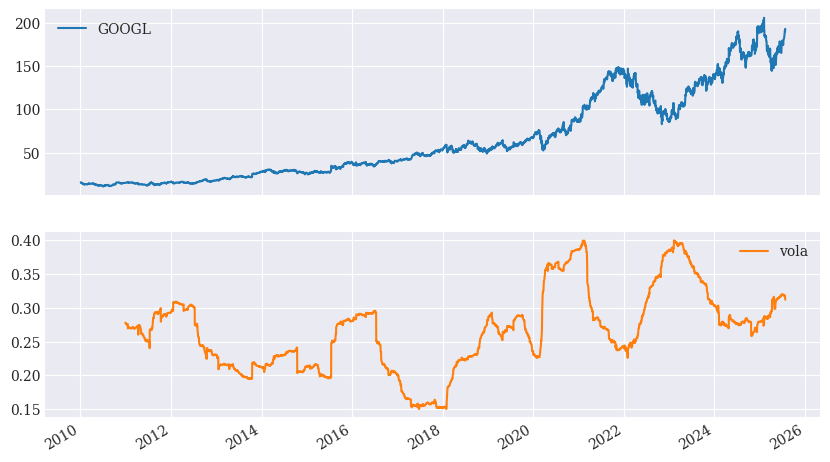

In [22]:
data[['GOOGL', 'vola']].plot(subplots=True, figsize=(10, 6));

#### 성능개선 기능

In [23]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

1.09 s ± 249 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

92.8 ms ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

77.3 ms ± 735 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

60.5 ms ± 687 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### AI-First Finance

In [27]:
data = fdr.DataReader('AAPL', '2010') #investing.com에서 코드를 확인
data.tail()

,Open,High,Low,Close,Volume,Adj Close
2025-07-21,212.100006,215.779999,211.630005,212.479996,51377400,212.479996
2025-07-22,213.139999,214.949997,212.229996,214.399994,46404100,214.399994
2025-07-23,215.000000,215.149994,212.410004,214.149994,46989300,214.149994
2025-07-24,213.899994,215.690002,213.529999,213.759995,46022600,213.759995
2025-07-25,214.699997,215.240005,213.399994,213.880005,40219700,213.880005


In [28]:
data = pd.DataFrame(data['Adj Close'])
data.dropna(inplace=True)
data.columns=['AAPL']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3914 entries, 2010-01-04 to 2025-07-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3914 non-null   float64
dtypes: float64(1)
memory usage: 61.2 KB


In [29]:
data['Returns'] = np.log(data / data.shift(1))

In [30]:
lags = 6

In [31]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)
data.dropna(inplace=True)

In [32]:
from sklearn.svm import SVC

In [33]:
model = SVC(gamma='auto')

In [34]:
model.fit(data[cols], np.sign(data['Returns']))

SVC(gamma='auto')

In [35]:
data['Prediction'] = model.predict(data[cols])

In [36]:
data['Strategy'] = data['Prediction'] * data['Returns']

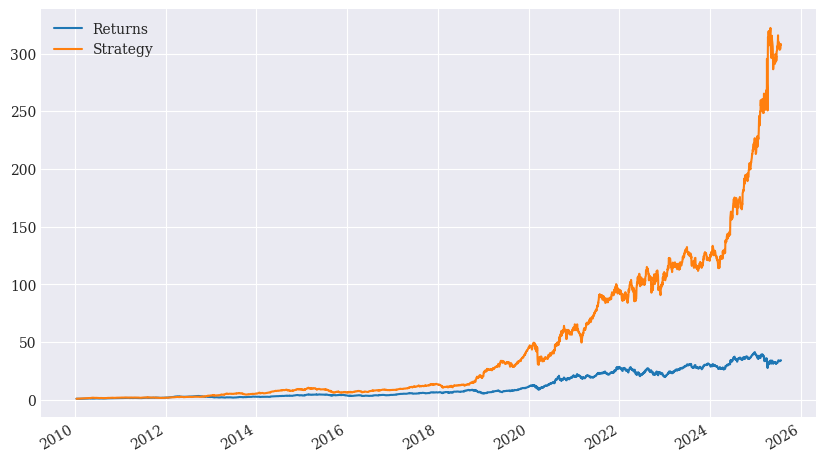

In [38]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot( figsize=(10, 6));